In [263]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
col_list = ["JobSat","ConvertedComp"]
data = pd.read_csv("C:/Users/noshi/Desktop/poralekha/Sem8/SoftwareMetrics/survey_results_public.csv",usecols=col_list)
print(data.shape)

(64461, 2)


In [264]:
data.dropna(inplace=True)
print(data.shape)

(34701, 2)


In [238]:
data['ConvertedComp'].min()

0.0

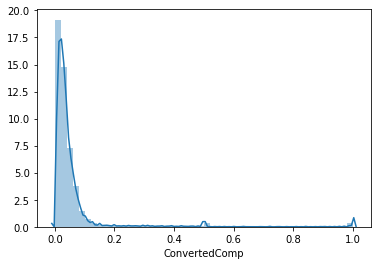

In [241]:
#histogram for normality check 
sns.distplot(data['ConvertedComp'])

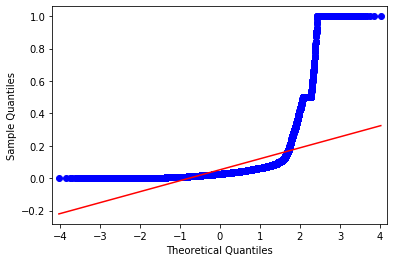

In [242]:
# q-q plot
qqplot(data['ConvertedComp'], line='r')
plt.show()

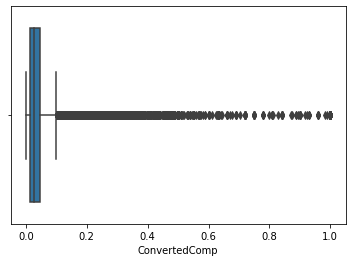

In [243]:
sns.boxplot(x=data['ConvertedComp'])
#too many outliers

In [244]:
#removing outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(32403, 2)

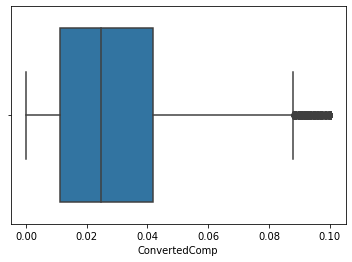

In [245]:
#boxplot after removing outliers
sns.boxplot(x=data_out['ConvertedComp'])

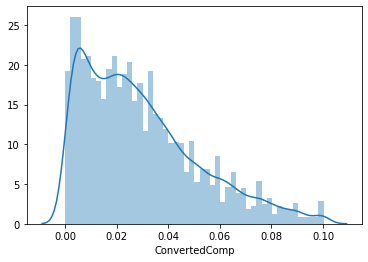

In [246]:
#Histogram after removing outliers 
sns.distplot(data_out['ConvertedComp'])

G:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


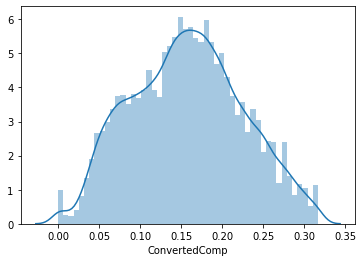

In [247]:
#Square root transformation
data_out['ConvertedComp']=data_out['ConvertedComp']**(.5)
sns.distplot(data_out['ConvertedComp'])

In [248]:
data_out['JobSat'].value_counts()

Very satisfied                        10438
Slightly satisfied                    10129
Slightly dissatisfied                  5401
Neither satisfied nor dissatisfied     3832
Very dissatisfied                      2603
Name: JobSat, dtype: int64

In [249]:
#Groups within 

very_satisfied = data_out['JobSat'].str.contains('Very satisfied', na = False)
comp_very_satisfied = data_out[very_satisfied]['ConvertedComp']

slightly_satisfied = data_out['JobSat'].str.contains('Slightly satisfied', na = False)
comp_slightly_satisfied = data_out[slightly_satisfied]['ConvertedComp']

neutral = data_out['JobSat'].str.contains('Neither satisfied nor dissatisfied', na = False)
comp_neutral = data_out[neutral]['ConvertedComp']

slightly_dissatisfied = data_out['JobSat'].str.contains('Slightly dissatisfied', na = False)
comp_slightly_dissatisfied = data_out[slightly_dissatisfied]['ConvertedComp']

very_dissatisfied = data_out['JobSat'].str.contains('Very dissatisfied', na = False)
comp_very_dissatisfied = data_out[very_dissatisfied]['ConvertedComp']

comp_very_satisfied = comp_very_satisfied[comp_very_satisfied > 0]
comp_slightly_satisfied = comp_slightly_satisfied[comp_slightly_satisfied > 0]
comp_neutral = comp_neutral[comp_neutral>0]
comp_slightly_dissatisfied = comp_slightly_dissatisfied[comp_slightly_dissatisfied > 0]
comp_very_dissatisfied = comp_very_dissatisfied[comp_very_dissatisfied > 0]

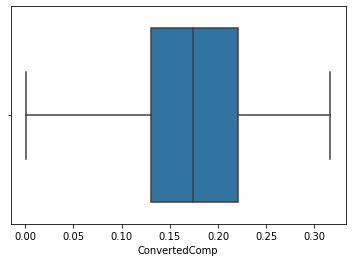

In [250]:
sns.boxplot(x = comp_very_satisfied)

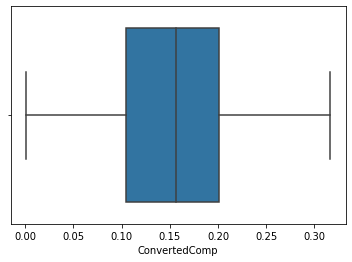

In [251]:
sns.boxplot(x = comp_slightly_satisfied)

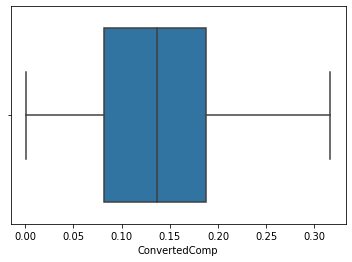

In [252]:
sns.boxplot(x = comp_neutral)

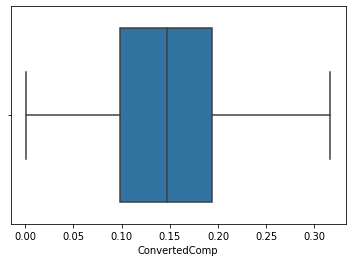

In [253]:
sns.boxplot(x = comp_slightly_dissatisfied)

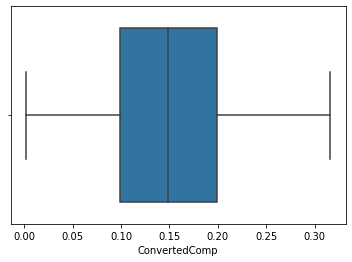

In [254]:
sns.boxplot(x = comp_very_dissatisfied)

In [255]:
#ANOVA assumes that the variances of the populations that the samples come from are equal.
#The variance of job satisfaction in each group can be seen by the length of each box plot. 
#The wider the box, the higher the variance.
#box widths are almost same
#that is variances are almost same

In [256]:
print(f_oneway(comp_very_satisfied, comp_slightly_satisfied, comp_neutral, comp_slightly_dissatisfied, comp_very_dissatisfied))

F_onewayResult(statistic=276.90978671674475, pvalue=1.760750952957891e-234)


In [257]:
#p-value<0.05
#null hypothesis rejected
#we have sufficient evidence to say that compensation differs with the level of job-satisfaction